In [2]:
import numpy as np 
import pandas as pd 
import os
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
import warnings
warnings.filterwarnings('ignore')

In [3]:
vixin =  "https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv"
vaccine=pd.read_csv(vixin)
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
vaccine.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [5]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [6]:
vaccine.shape

(26707, 34)

In [7]:
vaccine.drop(['unique_id'], inplace = True, axis = 1)

In [9]:
vaccine.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [10]:
vaccine1 = vaccine.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
       'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
       'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
       'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
       'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
       'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
       'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
       'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
        'h1n1_vaccine' : str})
vaccine1.dtypes.value_counts()

object    33
dtype: int64

In [11]:
vaccine_dummy = pd.get_dummies(vaccine1, drop_first= True )

In [12]:
vaccine_dummy.shape

(26707, 91)

In [13]:
vaccine_dummy['h1n1_vaccine_1'].value_counts(normalize = True)

0    0.787546
1    0.212454
Name: h1n1_vaccine_1, dtype: float64

In [14]:
y=vaccine_dummy['h1n1_vaccine_1']
x=vaccine_dummy.drop(['h1n1_vaccine_1'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
89,no_of_children_nan,inf
85,no_of_adults_nan,inf
24,dr_recc_seasonal_vacc_nan,inf
22,dr_recc_h1n1_vacc_nan,inf
52,is_seas_vacc_effective_nan,3.084567
...,...,...
81,census_msa_Non-MSA,0.006883
9,contact_avoidance_1.0,0.006745
17,reduced_outside_home_cont_1.0,0.005776
63,age_bracket_35 - 44 Years,0.003840


In [16]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=88)

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8557663504742886
Testing Score : 0.8431930507713045


In [18]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [19]:
from sklearn import metrics
t=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
t

,Pred_0,Pred_1
Act_0,15016,788
Act_1,2101,2125


In [20]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5229
           1       0.72      0.45      0.55      1448

    accuracy                           0.84      6677
   macro avg       0.79      0.70      0.73      6677
weighted avg       0.83      0.84      0.83      6677



In [21]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.938883,0.061117
1,0.967647,0.032353
2,0.463487,0.536513
3,0.988003,0.011997
4,0.853512,0.146488
...,...,...
20025,0.962643,0.037357
20026,0.949184,0.050816
20027,0.819506,0.180494
20028,0.769127,0.230873


In [22]:
x_tr=x_train.copy()
x_tr["Actual_Default"]=y_train
x_tr["Prob_Default"]=log.predict_proba(x_train)[:, 1]
x_tr

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_worry_nan,h1n1_awareness_1.0,h1n1_awareness_2.0,h1n1_awareness_nan,antiviral_medication_1.0,antiviral_medication_nan,contact_avoidance_1.0,...,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_adults_nan,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,no_of_children_nan,Actual_Default,Prob_Default
9353,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0.061117
6317,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0.032353
13542,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.536513
23986,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.011997
16025,1,0,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0.146488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24938,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0.037357
2481,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.050816
4047,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0.180494
6432,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0.230873


In [23]:
z=np.where(log.predict_proba(x_train)[:,1] > 0.232280104, 1, 0)

In [26]:
tr=pd.DataFrame(metrics.confusion_matrix(y_train , z), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
tr

,Pred_0,Pred_1
Act_0,13010,2794
Act_1,1034,3192


In [27]:
print(metrics.classification_report(y_train , z))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     15804
           1       0.53      0.76      0.63      4226

    accuracy                           0.81     20030
   macro avg       0.73      0.79      0.75     20030
weighted avg       0.84      0.81      0.82     20030



In [31]:
r=np.where(log.predict_proba(x_test)[:,1] > 0.229209326, 1, 0) 
p=pd.DataFrame(metrics.confusion_matrix(y_test , r), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
p

,Pred_0,Pred_1
Act_0,4285,944
Act_1,404,1044


In [32]:
print(metrics.classification_report(y_test , r))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      5229
           1       0.53      0.72      0.61      1448

    accuracy                           0.80      6677
   macro avg       0.72      0.77      0.74      6677
weighted avg       0.83      0.80      0.81      6677



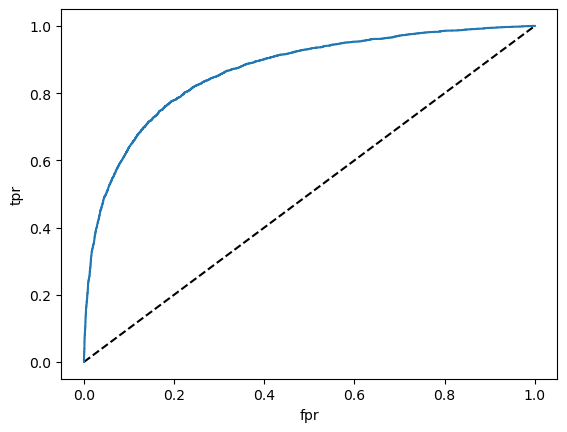

In [33]:
p1=log.predict_proba(x_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,p1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [34]:
metrics.roc_auc_score(y_train,p1)

0.8667507120771811

In [35]:
m=pd.DataFrame()
fn=pd.Series({'Model': " Logical Regression ",
                 'ROC Score' : metrics.roc_auc_score(y_test, r),
                 'Precision Score': metrics.precision_score(y_test, r),
                 'Recall Score': metrics.recall_score(y_test, r),
                 'F1 Score' : metrics.f1_score(y_test, r),
                 'Accuracy Score': metrics.accuracy_score(y_test, r)})
logis= m.append(fn, ignore_index = True)
logis

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logical Regression,0.770231,0.525151,0.720994,0.607683,0.798113
